### numpy

创建数组

In [1]:
import numpy as np

a=np.array([2,3,4])

print(a)

[2 3 4]


生成全是0的数组

In [2]:
a=np.zeros( (3,4) )
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


生成全是1的数组

In [3]:
a=np.ones( (3,4) )
print(a)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


生成随机的数据

In [4]:
# 指定范围内整数均匀分布
a=np.random.randint(0,10,(5,5))
print(a)

# 0-1均匀分布
a=np.random.rand(10)
print(a)
a=np.random.rand(5,5)
print(a)

# 标准正态分布
a=np.random.randn(10)
print(a)

[[2 2 0 3 1]
 [7 9 2 0 4]
 [4 4 6 6 8]
 [3 8 5 9 8]
 [6 4 1 0 6]]
[0.92892895 0.97510057 0.33434217 0.30828993 0.8728918  0.6570109
 0.10599634 0.6690177  0.15079863 0.13671812]
[[0.6651373  0.16820419 0.48750711 0.06376295 0.09130801]
 [0.16068798 0.31793478 0.72436894 0.30098975 0.06197907]
 [0.57864356 0.64434533 0.99691831 0.69382159 0.51929942]
 [0.43385272 0.87579704 0.69460734 0.48555687 0.2603991 ]
 [0.45490852 0.15175926 0.10851423 0.75959763 0.60468601]]
[-0.17555739 -2.56187551 -0.54420956  1.09535183 -0.45002583  0.31183913
  1.12831889  0.23872395 -1.5562174  -1.14734754]


In [5]:
# 指定范围内整数均匀分布
a=np.random.randint(0,10,(5,5))
print(a)

a.mean(axis=0)

[[2 3 3 7 8]
 [6 3 5 7 0]
 [6 5 2 2 7]
 [3 4 4 3 6]
 [3 9 4 3 1]]


array([4. , 4.8, 3.6, 4.4, 4.4])

用三维的方式来描述上面的三维数组0轴，1轴，2轴已经标注：
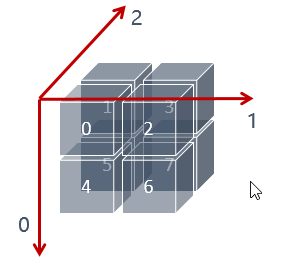

In [6]:
b=np.array([[[1,2],[3,4]],[[5,6],[7,8]],[[5,4],[7,8]]])
print(b)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]

 [[5 4]
  [7 8]]]


In [7]:
b.mean(axis=0)

array([[3.66666667, 4.        ],
       [5.66666667, 6.66666667]])

### pandas
pandas 主要有两个关键的数据结构 Series和Dataframe

### Series
有索引的序列化数据，前面的ndarray是没有索引的。

In [8]:
import pandas as pd

s = pd.Series([10,24,55,33])
s

0    10
1    24
2    55
3    33
dtype: int64

索引也可以自行定义

In [9]:
s.index=(['a','b','c','d'])
s

a    10
b    24
c    55
d    33
dtype: int64

甚至可以是时间序列

In [10]:
s = pd.Series([10,24,55,33],index=pd.date_range('1/1/2012', periods=4, freq='D'))
s

2012-01-01    10
2012-01-02    24
2012-01-03    55
2012-01-04    33
Freq: D, dtype: int64

### DataFrame 
数据框，类比于Excel二维表
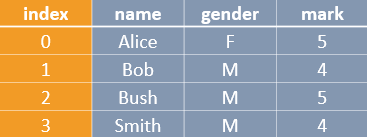
有几个关键的属性
* index 索引
* columns 列名
* 行
* 列
* 数据类型


In [11]:
data=np.array([[1,2],[3,4],[5,6],[7,8]])
df=pd.DataFrame(data,columns=['C1','C2'])

df

,C1,C2
0,1,2
1,3,4
2,5,6
3,7,8


添加列

In [12]:
df['C3']=[1,2,3,4]

df

,C1,C2,C3
0,1,2,1
1,3,4,2
2,5,6,3
3,7,8,4


选取数据

* 类似numpy使用索引号或者切片
* 使用条件筛选

In [13]:
df.iloc[2:4,1:3]

,C2,C3
2,6,3
3,8,4


In [14]:
df[df['C3']>2] # 单条件，多条件

,C1,C2,C3
2,5,6,3
3,7,8,4


---- 另一种定义方式 ----

用字典定义DataFrame

In [15]:
name=['Jerry','Tom','Jessica']
grade=[82,89,85]

df=pd.DataFrame({'name':name,'grade':grade})

df

,name,grade
0,Jerry,82
1,Tom,89
2,Jessica,85


运算

一般都是列进行运算，需要注意的是列要是可运算的数据类型才能运算


In [16]:
df['grade']+10

0    92
1    99
2    95
Name: grade, dtype: int64

可以定义新的列存储运算结果

In [17]:
df['new_grade']=df['grade']+10

df

,name,grade,new_grade
0,Jerry,82,92
1,Tom,89,99
2,Jessica,85,95


计算均值、最大值、最小值

使用内建函数运算时会跳过不可计算的列

In [18]:
df.mean()

grade        85.333333
new_grade    95.333333
dtype: float64

### csv文件
逗号分隔值（Comma-Separated Values，CSV，有时也称为字符分隔值，因为分隔字符也可以不是逗号），其文件以纯文本形式存储表格数据（数字和文本）。纯文本意味着该文件是一个字符序列，不含必须像二进制数字那样被解读的数据。

把下列字符串复制到文本文件后，将文件后缀保存为csv

`
学号,姓名,语文成绩,数学成绩,英语成绩
100001,A,86,75,94
100002,B,76,66,93
100003,C,87,99,99
100004,D,81,85,94
100005,E,95,86,81
100006,F,93,64,80
100007,G,65,83,99
100008,H,74,60,96
100009,I,74,71,61
100010,J,66,76,80
`

### 使用pandas读取数据集

In [19]:
import pandas as pd

df=pd.read_csv(r"C:\Users\JerryC\Desktop\student.csv",encoding='gbk')

数据读进来之后保存为pandas 的dataframe格式

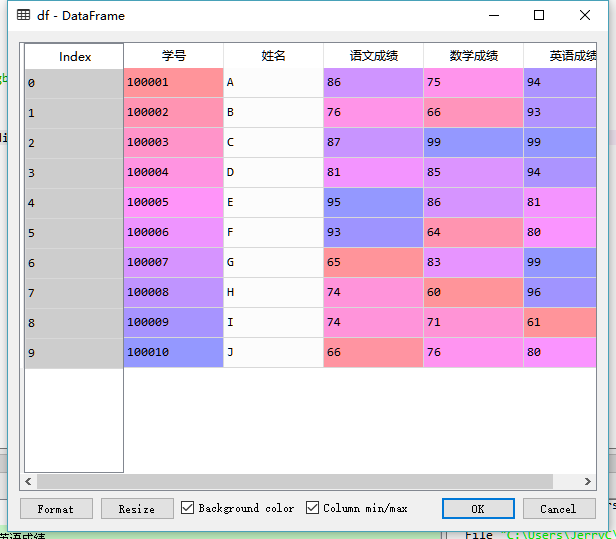

查看数据前几行

In [20]:
print(df.head())

       学号 姓名  语文成绩  数学成绩  英语成绩
0  100001  A    86    75    94
1  100002  B    76    66    93
2  100003  C    87    99    99
3  100004  D    81    85    94
4  100005  E    95    86    81


选中某一列

In [21]:
df['学号']

0    100001
1    100002
2    100003
3    100004
4    100005
5    100006
6    100007
7    100008
8    100009
9    100010
Name: 学号, dtype: int64

去重、去空值、填空值